In [1]:
import cv2
import matplotlib.pyplot as plt
import importlib
import cryptosystem

In [2]:
importlib.reload(cryptosystem)
from cryptosystem import Cryptosystem, Encryption, Decryption

In [158]:
image=cv2.imread('./outputs/fruits1024/fruits1024_cipher.png')
image_name = "fruits1024"
x = Cryptosystem(image)

m,n: 1024 1024


In [159]:
k = "afcd414b5b529546ced95f961150c58dbf99faff49f3ab820ec9841e88ad"
kd = "bfcd414b5b529546ced95f961150c58dbf99faff49f3ab820ec9841e88ad"

In [160]:
def hexadecimal_to_binary(hex_string):
    decimal_number = int(hex_string, 16)  # Convert hexadecimal string to decimal integer
    binary_string = bin(decimal_number)[2:]  # Convert decimal integer to binary string
    return binary_string



In [161]:
print(hexadecimal_to_binary(k))
print("\n ======== \n")
print(hexadecimal_to_binary(kd))

101011111100110101000001010010110101101101010010100101010100011011001110110110010101111110010110000100010101000011000101100011011011111110011001111110101111111101001001111100111010101110000010000011101100100110000100000111101000100010101101


101111111100110101000001010010110101101101010010100101010100011011001110110110010101111110010110000100010101000011000101100011011011111110011001111110101111111101001001111100111010101110000010000011101100100110000100000111101000100010101101


In [162]:
new_key = hexadecimal_to_binary(kd)

In [163]:
a1,b1,x0,y0 = x.generateInitials(new_key)
print(a1,b1,x0,y0)

18.408025877973234 17.694797580802135 0.6563416916515812 -0.8429732659873648


In [164]:
map1 = x.getChaoticMap(a1,b1,x0,y0)
map2 = x.getChaoticMap(a1,b1,map1[len(map1)-1][0],map1[len(map1)-1][1]) # map2 x0,y0 from the last values of map1 as given in paper
map3 = x.getChaoticMap(a1,b1,map2[len(map2)-1][0],map2[len(map2)-1][1])
map4 = x.getChaoticMap(a1,b1,map3[len(map3)-1][0],map3[len(map3)-1][1])
map5 = x.getChaoticMap(a1,b1,map4[len(map4)-1][0],map4[len(map4)-1][1])
map6 = x.getChaoticMap(a1,b1,map5[len(map5)-1][0],map5[len(map5)-1][1])

In [165]:
IV = x.getfloorIV(8,map1)

In [166]:
rm1 = x.getRuleMap(map2,8)
rm2 = x.getRuleMap(map3,8)
rm3 = x.getRuleMap(map5,8)
rm4 = x.getRuleMap(map6,8)

No of times rule present in rule map
{1: 518144, 2: 526336, 3: 508928, 4: 515072, 5: 544768, 6: 526336, 7: 528384, 8: 526336}
No of times rule present in rule map
{1: 538624, 2: 553984, 3: 483328, 4: 530432, 5: 486400, 6: 536576, 7: 519168, 8: 545792}
No of times rule present in rule map
{1: 539648, 2: 532480, 3: 496640, 4: 517120, 5: 526336, 6: 503808, 7: 536576, 8: 541696}
No of times rule present in rule map
{1: 566272, 2: 529408, 3: 507904, 4: 538624, 5: 490496, 6: 520192, 7: 522240, 8: 519168}


In [167]:
DSM = x.getDSMMap(map4,rm2)

No of times Neucleotides present in DSMap
{'G': 1058807, 'A': 1063897, 'T': 1067987, 'C': 1003613}


## Decryption

In [168]:
d=Decryption(image)

Displaying the pixel matrices over the Image


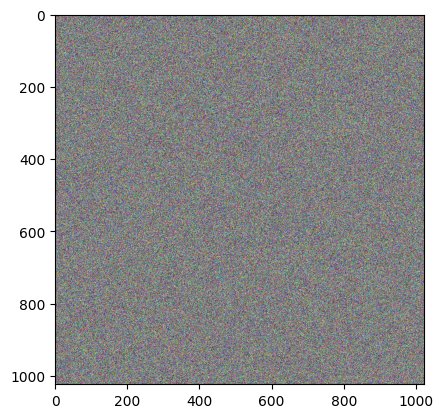

In [169]:
r,g,b=d.matrices()

In [170]:
ered,eblue,egreen   = d.encoding(r,g,b,rm4)

In [171]:
sred,sblue,sgreen = [],[],[]
sred   = d.rSubstitution(ered,DSM,rm3)
sblue  = d.rSubstitution(eblue,DSM,rm3)
sgreen = d.rSubstitution(egreen,DSM,rm3)

In [172]:
dred   = d.Decoding(sred,rm1)
dblue  = d.Decoding(sblue,rm1)
dgreen = d.Decoding(sgreen,rm1)

In [173]:
fred = d.toMatrix(dred)
fblue = d.toMatrix(dblue)
fgreen = d.toMatrix(dgreen)

In [174]:
dmixRed = d.rSpiralMixing(fred)
dmixBlue = d.rSpiralMixing(fblue)
dmixGreen = d.rSpiralMixing(fgreen)

In [175]:
dacmr,dacmg,dacmb = d.applyRevACM_numba(dmixRed,dmixGreen,dmixBlue)

m= 1024, n= 1024,
N(length of side) = 1024,
alpha(number of squares) = 1,
L(an extra length) = 0,
eta(length of overlapping except last) = 1024, k = 509.


In [176]:
dfinalR = d.rmixRow(dacmr,IV)
dfinalG = d.rmixRow(dacmg,IV)
dfinalB = d.rmixRow(dacmb,IV)

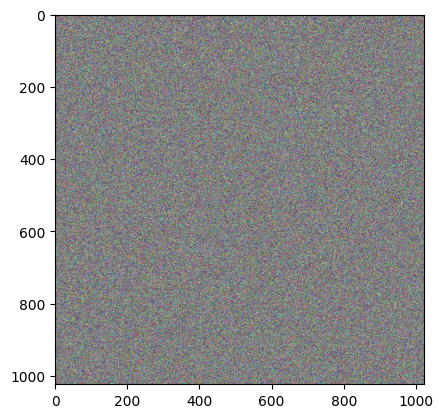

In [177]:
decodedImage=d.getDecodedImage(dfinalR,dfinalG,dfinalB)

In [178]:
import os
cipherd = cv2.merge((dfinalB,dfinalG,dfinalR))
ks_directory = f"outputs/key_sensitivity"
os.makedirs(ks_directory, exist_ok=True)  # Ensure directory exists

file_path = os.path.join(ks_directory, f"{image_name}_ks.png")
success = cv2.imwrite(file_path, cipherd)
if success:
    print(f"Image saved successfully at {file_path}")
else:
    print("Failed to save image. Check if the image is valid.")

Image saved successfully at outputs/key_sensitivity/fruits1024_ks.png
